#### ML Analysis #5 - Naïve Bayes
Chesta Dewangan

For 5th Model we choose Naïve Bayes. 

Why Naïve Bayes?
- Trains and predict very quickly.
- Strong baseline to compare against more complex models like GBM and SVM.
- Naïve Bayes assumes feature independence, it can tolerate imperfections after filling missing values.

In [37]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, roc_auc_score, ConfusionMatrixDisplay, classification_report, confusion_matrix)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB

In [38]:
# Load the (preprocessed) data
df = pd.read_csv("notebooks/ckd_preprocessed.csv")

Preprocessing Setup

In [39]:
X = df.drop('classification', axis=1)
y = df['classification']

le = LabelEncoder()
y = le.fit_transform(y)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

Data Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

Pipeline

In [41]:
nb_model = GaussianNB()

nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nb_model)
])

Train & Predict

In [42]:
nb_pipeline.fit(X_train, y_train)

y_pred_nb = nb_pipeline.predict(X_test)
y_proba_nb = nb_pipeline.predict_proba(X_test)[:, 1]

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        63
           1       0.88      1.00      0.94        37

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100

Accuracy Score: 0.95
ROC AUC Score: 0.9603174603174603


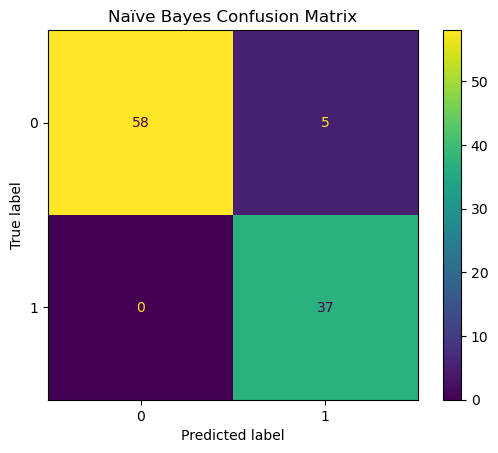

In [43]:
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

print("Accuracy Score:", accuracy_score(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_nb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

The model correctly predicted CKD or non-CKD with an accuracy of 95%. Naïve Bayes model correctly identifies almost all CKD patients (Recall for class 1 = 1.00), which is very important in medical diagnosis where missing a positive case could be risky. ROC AUC of 0.96 indicates that the model is very good at ranking patients based on risk.